---
# Esercitazione 6
---
## Esercizio 06.1 - Modello di Ising 1D
Questa esercitazione è incentrata sul riprodurre il modello di Ising 1D, in grado di descrivere le interazioni tra spin in un reticolo. Il sproblema (insieme al solo caso 2D) è risolubile analiticamente e, in unità di $k_B=1$ e $\mu_B = 1$, l'hamiltoniana di un sistema di N spin interagenti è la seguente:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $\{ s_i \}_{i=1,N}$ sono variabili di spin che assumono i valori $\{-1;1\}$ e $J$ è una costante di accoppiamento tra spin (se $J>0$ corrisponde a un modello ferromagnetico, in quanto favorisce spin allineati). Si considerano le condizioni periodiche al bordo ($s_{N+1} = s_{1}$) e un'interazione tra spin vicini (si influenzano solo gli spin adiacenti).

L'implementazione viene fatta utilizzando l'algoritmo di Metropolis e di Gibbs. Verranno calcolate:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

in funzione della temperatura $T$, nel range $\left[0.5;2.0\right]$, per un sistema di $N=50$ spin con costante di interazione tra spin $J=1$. $\\$
I risultati ottenuti utilizzando i due algoritmi vengono confrontati con le rispettive curve analitiche. $\\$

### Equilibrazione
Prima di svolgere l'analisi, è necessario verificare il numero di step necessari per raggiungere l'equilibrio. Per fare ciò vengono mostrati, per entrambi gli algoritmi, i risultati dell'energia totale del sistema al variare degli step MC, ottenuti con le seguenti condizioni: $T=2$, $h=0$, raggiungendo un totale di $1000$ step e a partire da una configurazione casuale del sistema $\\$

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# carico l'energia misurata nei due algoritmi
E_metro = np.loadtxt("./dati/Metropolis/Equilibration.dat", unpack= True, usecols=(0), skiprows=0)
E_gibbs = np.loadtxt("./dati/Gibbs/Equilibration.dat", unpack= True, usecols=(0), skiprows=0)

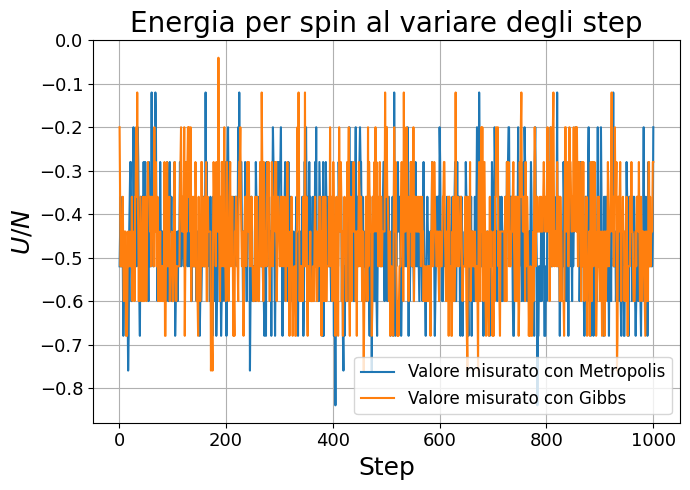

In [8]:
N = len(E_metro)        # numero di step per Metropolis e Gibbs
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Energia per spin al variare degli step",fontsize=20)

plt.plot(x[:1000], E_metro[:1000], label = "Valore misurato con Metropolis")
plt.plot(x[:1000], E_gibbs[:1000], label = "Valore misurato con Gibbs")

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"$U/N$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Dal plot precedente, per entrambi gli algoritmi, è possibile constatare che il sistema raggiunge l'equilibrio da subito, infatti l'energia per spin oscilla sempre nello stesso range di valori; per tanto, verrà omessa la fase di equilibrazione, considerando anche che gli step utilizzati più avanti saranno ordini di grandezza superiori.

### Scelta del numero di blocchi
Il numero di blocchi appropriato da utilizzare viene stimato con il medoto del "block averaging". Plotto l'errore calcolato dal dataset dell'energia, al variare del numero di blocchi utilizzato e a numero di simulazioni fissate ($10^6$). Il numero di blocchi scelto è quello alla quale l'errore inizia a saturare.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# carico l'errore dell'energia misurata nei due algoritmi al variare del numero di blocchi
Nblk, err_E_metro = np.loadtxt("./dati/Metropolis/Energy_Data_Over_Blocks.dat", unpack= True, usecols=(0,3), skiprows=0)
Nblk, err_E_gibbs = np.loadtxt("./dati/Gibbs/Energy_Data_Over_Blocks.dat", unpack= True, usecols=(0,3), skiprows=0)

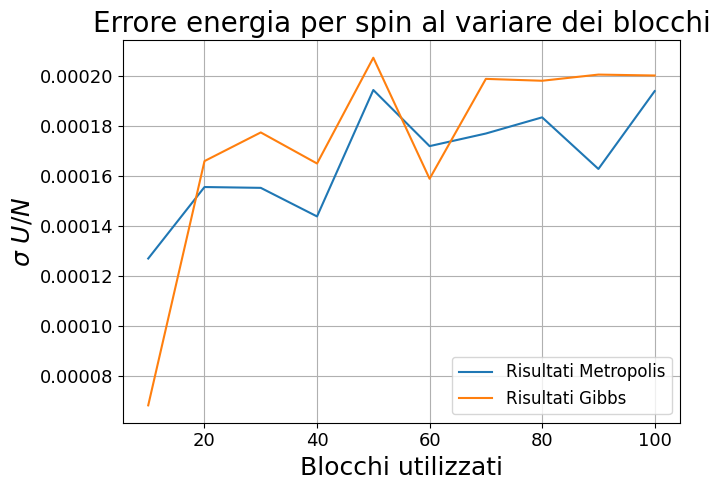

In [20]:
plt.figure(figsize=(7, 5))
plt.title(r"Errore energia per spin al variare dei blocchi",fontsize=20)

plt.plot(Nblk, err_E_metro, label = "Risultati Metropolis")
plt.plot(Nblk, err_E_gibbs, label = "Risultati Gibbs")

plt.xlabel(r"Blocchi utilizzati", fontsize=18)
plt.ylabel(r"$\sigma$ $U/N$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# plt.ylim(-0.463, -0.461)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Si può notare che l'errore sull'energia inizia a saturare verso $50$ blocchi utilizzati, pertanto verrà usata questa divisione, che garantisce la non correlazione tra i valori del dataset. $\\$
Di seguito vengono riportati i risultati da calcolare, citati all'inizio, utilizzando $2\cdot 10^5$ step per ognuno dei $50$ blocchi.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# carico i risultai ottenuti e relativo errore dalle due metodologie e la temperatura 
eneM, err_eneM, T  = np.loadtxt("./dati/Metropolis/output.ene.0", usecols=(2,3,4), unpack = 'true')
heatM, err_heatM   = np.loadtxt("./dati/Metropolis/output.heat.0", usecols=(2,3), unpack = 'true')
magM, err_magM     = np.loadtxt("./dati/Metropolis/output.mag.0", usecols=(2,3), unpack = 'true')
chiM, err_chiM     = np.loadtxt("./dati/Metropolis/output.chi.0", usecols=(2,3), unpack = 'true')

eneG, err_eneG   = np.loadtxt("./dati/Gibbs/output.ene.0", usecols=(2,3), unpack = 'true')
heatG, err_heatG = np.loadtxt("./dati/Gibbs/output.heat.0", usecols=(2,3), unpack = 'true')
magG, err_magG   = np.loadtxt("./dati/Gibbs/output.mag.0", usecols=(2,3), unpack = 'true')
chiG, err_chiG   = np.loadtxt("./dati/Gibbs/output.chi.0", usecols=(2,3), unpack = 'true')

# Calcolo i valori analitici
Te = np.linspace(T[0], T[-1], num=100) # temperatura per i grafici analitici
b = 1/Te # beta
J = 1.0
Ns = 50 # numero di spin
th = np.tanh(J/Te)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN ) # U/N con h=0
c =((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) # Capacità termica con h=0

# ora calcolo la magnetizzazione analitica con h=0.02
h=0.02 # campo magnetico esterno
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

X = b*np.exp(2*b*J)*(1-thN)/(1+thN) # suscettibilità magnetica con h=0


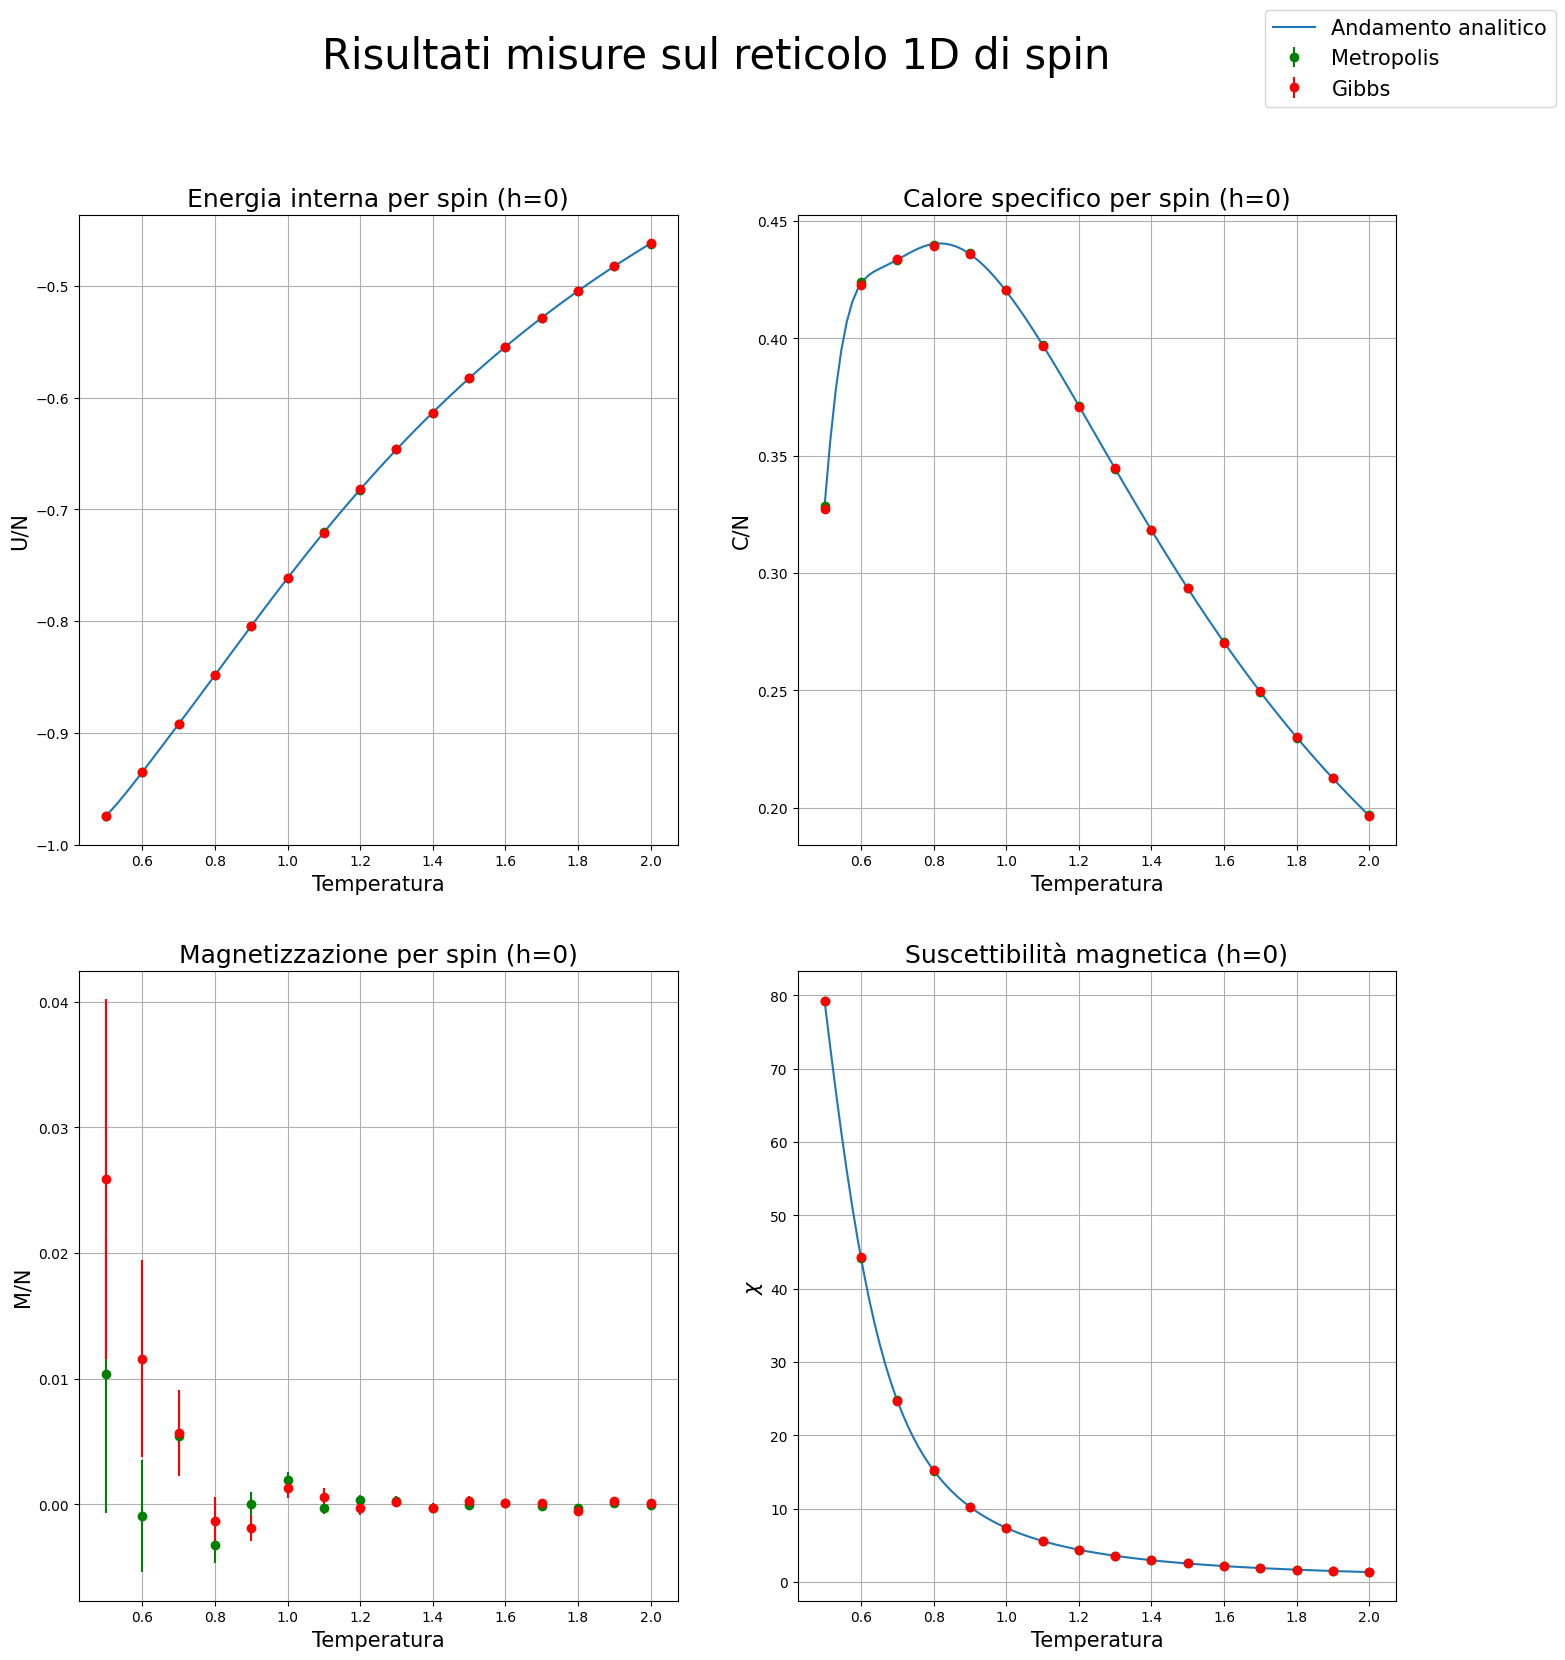

In [6]:
fig, axs = plt.subplots(2,2, figsize = (17,18))
fig.suptitle("Risultati misure sul reticolo 1D di spin", fontsize = (30))

plt.subplot(2,2,1)
plt.errorbar(T, eneM, yerr=err_eneM, fmt='go', label = "Metropolis")
plt.errorbar(T, eneG, yerr=err_eneG, fmt='ro', label = "Gibbs")
plt.plot(Te, e, label = "Andamento analitico" )
plt.title("Energia interna per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("U/N", fontsize = 15)
plt.grid(True)


plt.subplot(2,2,2)
plt.errorbar(T, heatM, yerr=err_heatM, fmt='go')
plt.errorbar(T, heatG, yerr=err_heatG, fmt='ro')
plt.plot(Te, c)
plt.title("Calore specifico per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("C/N", fontsize = 15)
plt.grid(True)


plt.subplot(2,2,3)
plt.errorbar(T, magM, yerr=err_magM, fmt='go')
plt.errorbar(T, magG, yerr=err_magG, fmt='ro')
# plt.plot(Te, M, label = "Andamento analitico" )
plt.title("Magnetizzazione per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("M/N", fontsize = 15)
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(T, chiM, yerr=err_chiM, fmt='go')
plt.errorbar(T, chiG, yerr=err_chiG, fmt='ro')
plt.plot(Te, X)
plt.title("Suscettibilità magnetica (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("$\chi$", fontsize = 15)
plt.grid(True)

fig.legend(fontsize = 15)

plt.show()

Le misure di energia, capacità termica e suscettibilità magnetica seguono l'andamento analitico previsto, confermando la riuscita dell'analisi. Per quanto riguarda la magnetizzazione, si può notare che essa tende a zero come aspettato per valori di temperatura sufficientemente elevati (paramagnetismo), mentre il sistema è ferromagnetico per temperature inferiori. Il plot riportato riguarda infatti i risultati ottenuti in assenza di campo magnetico esterno. Successivamente vengono mostrati i risultati ottenuti tramite i due algoritmi della magnetizzazione in presenza di campo esterno.

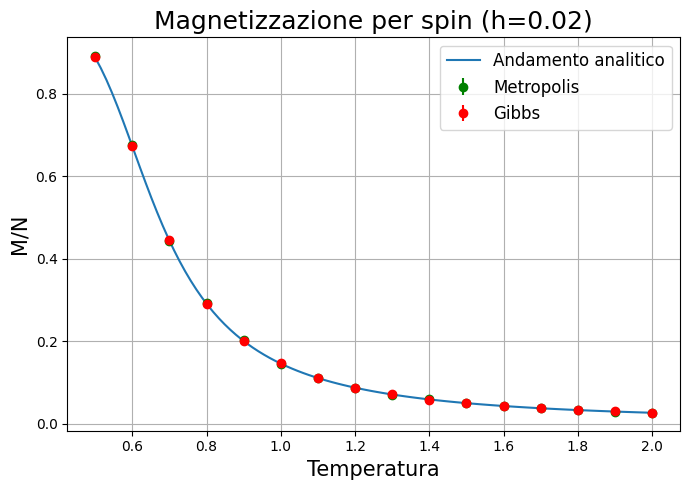

In [9]:
magM_h, err_magM_h   = np.loadtxt("./dati/Metropolis/output.mag_h.0", usecols=(2,3), unpack = 'true')
magG_h, err_magG_h   = np.loadtxt("./dati/Gibbs/output.mag_h.0", usecols=(2,3), unpack = 'true')

plt.figure(figsize=(7, 5))
plt.title("Magnetizzazione per spin (h=0.02)", fontsize=18)
plt.errorbar(T, magM_h, yerr=err_magM_h, fmt='go', label = "Metropolis")
plt.errorbar(T, magG_h, yerr=err_magG_h, fmt='ro', label = "Gibbs")
plt.plot(Te, M, label = "Andamento analitico" )
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("M/N", fontsize = 15)
plt.grid(True)

plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Anche in questo caso si conferma il corretto andamento misurato, compatibile con quanto calcolato analiticamente, utilizzando entrambi i metodi computazionali.

## Modello di Ising 2D
Nel file "Ising_2D.py" è presente l'implementazione del modello di Ising in due dimensioni, con relativa animazione. Il video già renderizzato è presente nella cartella ".\media\videos\Ising_2D\480p60\IsingModel.mp4"